# Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
import os

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [2]:
df_X = pd.read_csv("../data/raw/train_values.csv")
df_y = pd.read_csv("../data/raw/train_labels.csv")
df_raw = df_X.merge(df_y, on='building_id')  # Training features and labels. Will be split for validation.
df_raw_test = pd.read_csv("../data/raw/test_values.csv")  # Test features, NO labels (used for submission)

In [3]:
# Repo root directory is the parent of the current directory (notebooks)
!pwd

/home/devin/git/data-driven-nepal-earthquake/notebooks


In [4]:
# Script variables
dir_root = os.path.dirname(os.getcwd())
dir_data = os.path.join(dir_root, 'data/')
dir_data_raw = os.path.join(dir_data, 'raw/')
dir_data_interim = os.path.join(dir_data, 'interim/')
# dif_data_clean = dir_data + 'clean/'

In [5]:
!ls ../data/

download_data.sh  interim  raw


# Exploratory data analysis

In [6]:
display(df_X.head(2))

print("Train shape: {}".format(df_raw.shape))
print("Test shape:  {}".format(df_raw_test.shape))

#df_raw.info()
#df_raw.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


Train shape: (260601, 40)
Test shape:  (86868, 39)


In [7]:
df_raw.info()
#df_raw.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
building_id                               260601 non-null int64
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
land_surface_condition                    260601 non-null object
foundation_type                           260601 non-null object
roof_type                                 260601 non-null object
ground_floor_type                         260601 non-null object
other_floor_type                          260601 non-null object
position                                  260601 non

In [8]:
df_raw.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,0.018235,0.068154,0.075268,0.254988,0.085011,0.042590,0.015859,0.014985,0.983949,0.111880,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,0.133800,0.252010,0.263824,0.435855,0.278899,0.201931,0.124932,0.121491,0.418389,0.315219,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [9]:
df_raw['damage_grade'].describe()

count    260601.000000
mean          2.238272
std           0.611814
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           3.000000
Name: damage_grade, dtype: float64

In [10]:
df_raw['damage_grade'].value_counts()

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

In [11]:
df_raw['damage_grade'].value_counts(normalize=True)

/usr/local/lib/python2.7/dist-packages/pandas/core/computation/check.py:19: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.6.1

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


2    0.568912
3    0.334680
1    0.096408
Name: damage_grade, dtype: float64

In [12]:
# Categorical object feats
cat_feats = df_raw.select_dtypes(exclude='number').columns
display(df_raw[cat_feats].nunique())

# Categorical geo feats
geo_level_id_feats = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id']

land_surface_condition     3
foundation_type            5
roof_type                  3
ground_floor_type          5
other_floor_type           4
position                   4
plan_configuration        10
legal_ownership_status     4
dtype: int64

/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


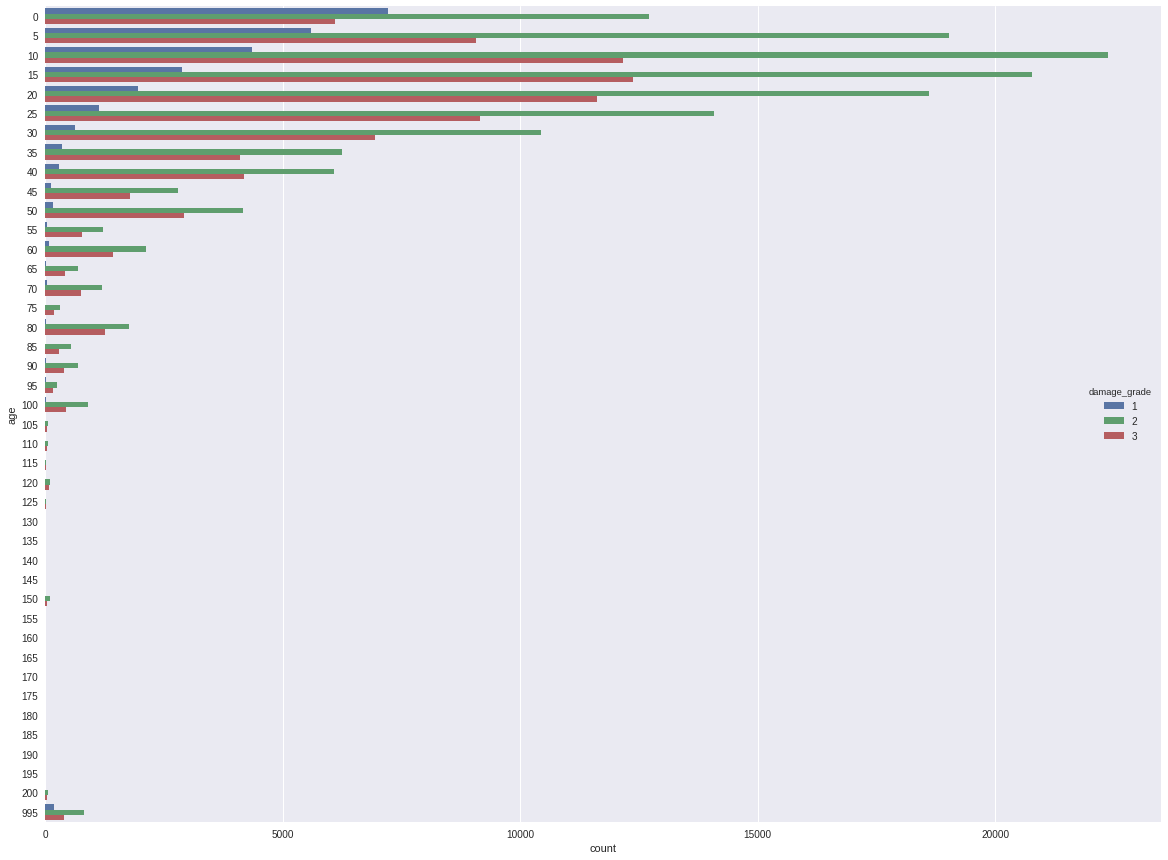

In [13]:
# Age
plt.figure(figsize=(20, 15))
sns.countplot(y='age', hue='damage_grade', data=df_raw)
plt.show()

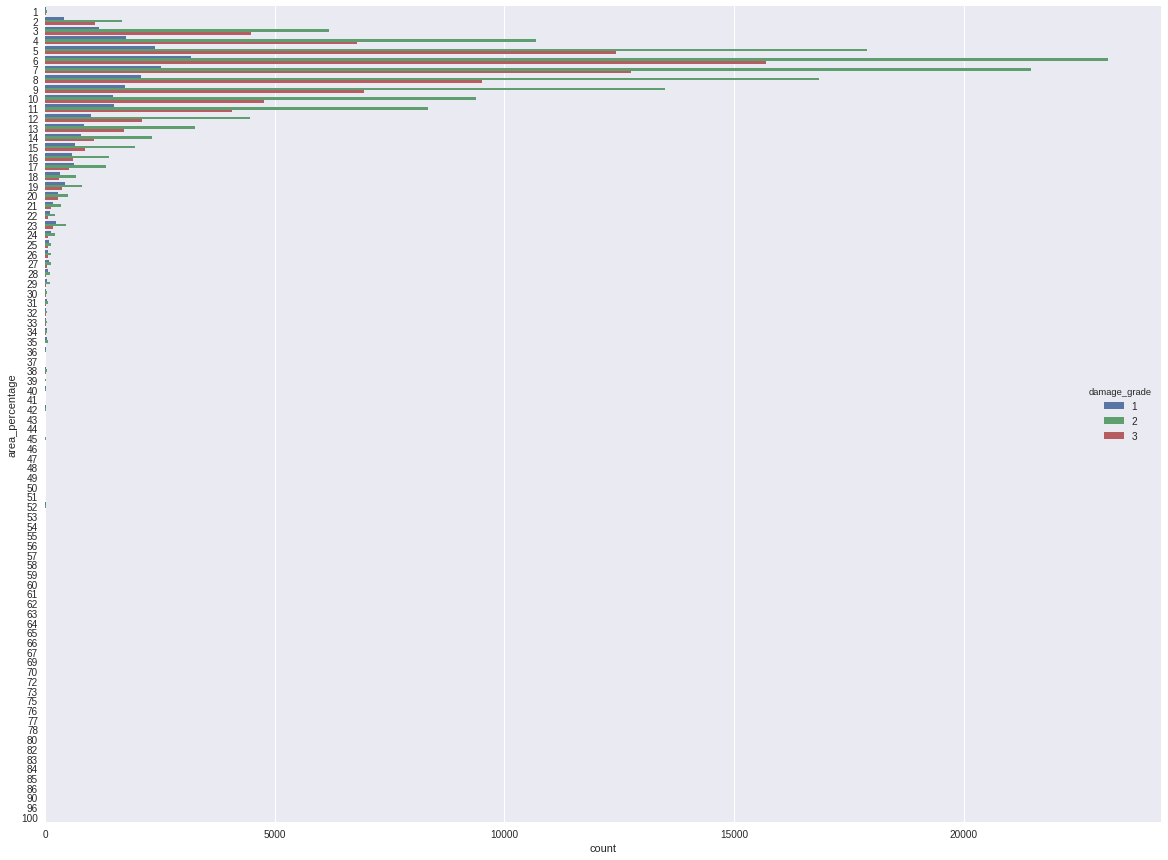

In [14]:
# Area percentage
plt.figure(figsize=(20, 15))
sns.countplot(y='area_percentage', hue='damage_grade', data=df_raw)
plt.show()

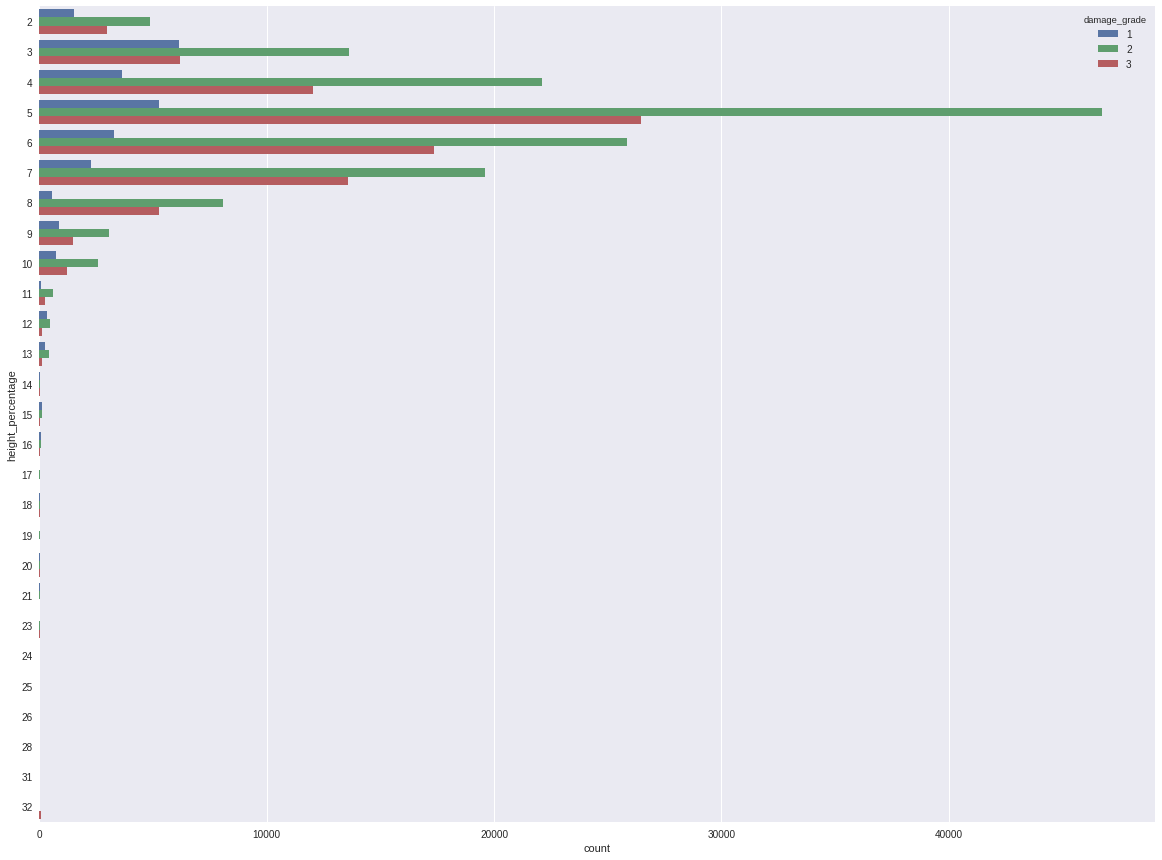

In [15]:
# Height percentage
plt.figure(figsize=(20, 15))
sns.countplot(y='height_percentage', hue='damage_grade', data=df_raw)
plt.show()

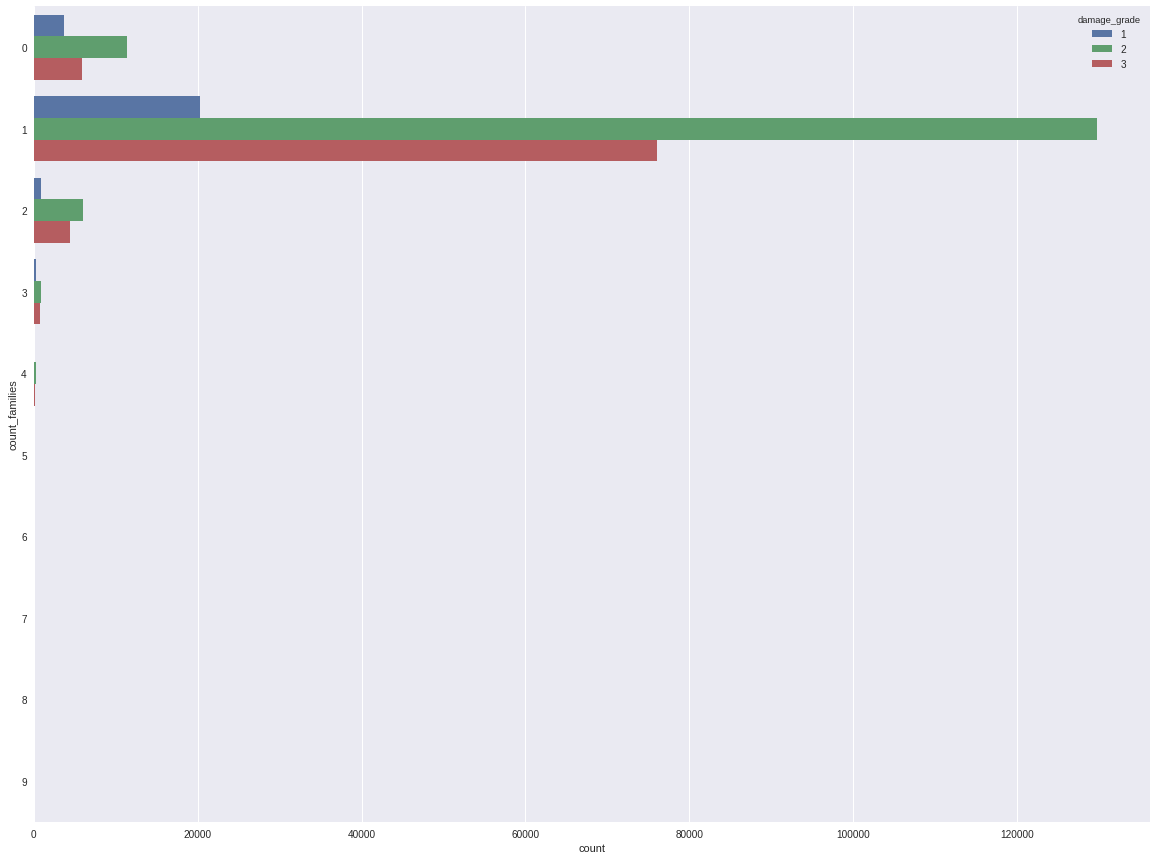

In [16]:
# Count families
plt.figure(figsize=(20, 15))
sns.countplot(y='count_families', hue='damage_grade', data=df_raw)
plt.show()

# Train-Validation Set Creation

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_val, _, _ = train_test_split(
    df_raw.values,
    df_raw['damage_grade'].values,
    stratify=df_raw['damage_grade'].values,
    test_size=0.33,
    random_state=9
)

df_raw_train = pd.DataFrame(X_train, columns=df_raw.columns).infer_objects()
df_raw_val = pd.DataFrame(X_val, columns=df_raw.columns).infer_objects()

(174602, 40)
(85999, 40)
(86868, 39)


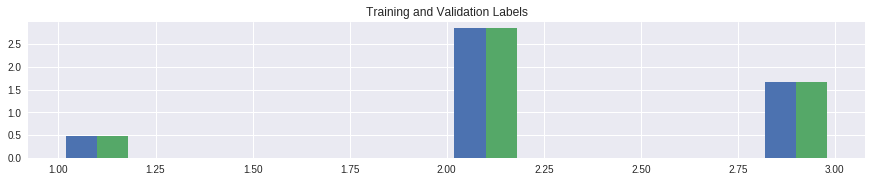

In [19]:
print(df_raw_train.shape)
print(df_raw_val.shape)
print(df_raw_test.shape)

plt.figure(figsize=(15, 2.5))
plt.hist([df_raw_train['damage_grade'].values, df_raw_val['damage_grade'].values], density=True)
plt.title("Training and Validation Labels")
plt.show()

# Feature Engineering

In [20]:
df_interim_train = df_raw_train
df_interim_val = df_raw_val
df_interim_test = df_raw_test

In [21]:
# Create ratio features
def create_interaction_features(df):
    return (df.assign(
        age_mul_area=df.age * df.area_percentage,
        age_div_area=df.age / df.area_percentage.replace(0, 0.1),
        age_mul_fam=df.age * df.count_families,
        age_div_fam=df.age / df.count_families.replace(0, 0.1),
        area_mul_fam=df.area_percentage * df.count_families,
        area_div_fam=df.area_percentage / df.count_families.replace(0, 0.1)
    ))

df_interim_train = create_interaction_features(df_interim_train)
df_interim_val = create_interaction_features(df_interim_val)
df_interim_test = create_interaction_features(df_interim_test)

In [22]:
# Categorical: one hot encoding
df_interim_train = pd.concat([df_interim_train, pd.get_dummies(df_interim_train[cat_feats])], axis=1)
df_interim_val = pd.concat([df_interim_val, pd.get_dummies(df_interim_val[cat_feats])], axis=1)
df_interim_test = pd.concat([df_interim_test, pd.get_dummies(df_interim_test[cat_feats])], axis=1)

In [23]:
# Define features to label encode
feats_to_label_encode = (
    list(cat_feats) + 
    geo_level_id_feats + 
    ['age', 'area_percentage', 'height_percentage', 'count_families'] +        
    ['age_mul_area', 'age_div_area', 'age_mul_fam', 'age_div_fam', 'area_mul_fam', 'area_div_fam']
)

In [24]:
feats_to_label_encode

['land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'legal_ownership_status',
 'geo_level_1_id',
 'geo_level_2_id',
 'geo_level_3_id',
 'age',
 'area_percentage',
 'height_percentage',
 'count_families',
 'age_mul_area',
 'age_div_area',
 'age_mul_fam',
 'age_div_fam',
 'area_mul_fam',
 'area_div_fam']

In [26]:
# Categorical: mean label encoding
damage_grade_dummies = pd.get_dummies(df_interim_train['damage_grade'], prefix='damage_grade')
for feat in feats_to_label_encode:
    mappings = (
        df_interim_train.groupby(feat)['damage_grade'].agg(['mean'])
        .to_dict()
    )
    df_interim_train["{}_labelEnc".format(feat)] = df_interim_train[feat].map(mappings['mean'])
    df_interim_val["{}_labelEnc".format(feat)] = df_interim_val[feat].map(mappings['mean'])
    df_interim_test["{}_labelEnc".format(feat)] = df_interim_test[feat].map(mappings['mean'])

In [27]:
# Categorical: standard deviation label encoding
damage_grade_dummies = pd.get_dummies(df_interim_train['damage_grade'], prefix='damage_grade')
for feat in feats_to_label_encode:
    mappings = (
        df_interim_train.groupby(feat)['damage_grade'].agg(['std'])
        .to_dict()
    )
    df_interim_train["{}_labelEncStd".format(feat)] = df_interim_train[feat].map(mappings['std'])
    df_interim_val["{}_labelEncStd".format(feat)] = df_interim_val[feat].map(mappings['std'])
    df_interim_test["{}_labelEncStd".format(feat)] = df_interim_test[feat].map(mappings['std'])

In [28]:
df_interim_train.shape

(174602, 126)

In [29]:
# Catigorical: drop original columns
df_interim_train = df_interim_train.drop(list(cat_feats) + geo_level_id_feats, axis=1)
df_interim_val = df_interim_val.drop(list(cat_feats) + geo_level_id_feats, axis=1)
df_interim_test = df_interim_test.drop(list(cat_feats) + geo_level_id_feats, axis=1)

In [30]:
df_interim_train.shape

(174602, 115)

In [31]:
n_feats = df_interim_train.drop(['damage_grade', 'building_id'], axis=1).shape[1]
n = df_interim_train.shape[0]

print("Num features: {}".format(n_feats))
#print("Features to data ratio: {:.3}".format(n_feats / n))
print("Features to data ratio: {0:.4f}".format(n_feats / float(n)))
display(df_interim_train.head())

Num features: 113
Features to data ratio: 0.0006


,building_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,age_div_area,age_div_fam,age_mul_area,age_mul_fam,area_div_fam,area_mul_fam,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w,land_surface_condition_labelEnc,foundation_type_labelEnc,roof_type_labelEnc,ground_floor_type_labelEnc,other_floor_type_labelEnc,position_labelEnc,plan_configuration_labelEnc,legal_ownership_status_labelEnc,geo_level_1_id_labelEnc,geo_level_2_id_labelEnc,geo_level_3_id_labelEnc,age_labelEnc,area_percentage_labelEnc,height_percentage_labelEnc,count_families_labelEnc,age_mul_area_labelEnc,age_div_area_labelEnc,age_mul_fam_labelEnc,age_div_fam_labelEnc,area_mul_fam_labelEnc,area_div_fam_labelEnc,land_surface_condition_labelEncStd,foundation_type_labelEncStd,roof_type_labelEncStd,ground_floor_type_labelEncStd,other_floor_type_labelEncStd,position_labelEncStd,plan_configuration_labelEncStd,legal_ownership_status_labelEncStd,geo_level_1_id_labelEncStd,geo_level_2_id_labelEncStd,geo_level_3_id_labelEncStd,age_labelEncStd,area_percentage_labelEncStd,height_percentage_labelEncStd,count_families_labelEncStd,age_mul_area_labelEncStd,age_div_area_labelEncStd,age_mul_fam_labelEncStd,age_div_fam_labelEncStd,area_mul_fam_labelEncStd,area_div_fam_labelEncStd
0,646840,2,10,6,5,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,1.666667,10.0,60,10,6.0,6,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,2.252045,2.329739,2.321636,2.309248,2.314577,2.308369,2.244026,2.244344,2.159564,2.062731,2.217391,2.202349,2.296492,2.270011,2.246567,2.247033,2.239249,2.211263,2.221352,2.296673,2.294870,0.575013,0.564937,0.587348,0.576524,0.552534,0.612970,0.609154,0.608224,0.455782,0.285018,0.421741,0.620447,0.601404,0.575006,0.604284,0.616708,0.601980,0.614503,0.611749,0.598325,0.598699
1,65184,2,20,7,5,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,2.857143,20.0,140,20,7.0,7,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,2.234359,2.329739,2.269080,2.309248,2.314577,2.229214,2.244026,2.244344,2.335844,2.364656,2.338710,2.302689,2.278836,2.270011,2.246567,2.302886,2.328793,2.303400,2.308935,2.280480,2.279305,0.618383,0.564937,0.587667,0.576524,0.552534,0.610816,0.609154,0.608224,0.566114,0.619429,0.599003,0.576155,0.581048,0.575006,0.604284,0.578960,0.559715,0.573445,0.569695,0.577536,0.578414
2,1009445,1,5,8,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0.625000,5.0,40,5,8.0,8,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,2.234359,2.329739,2.269080,2.309248,2.043141,2.229214,2.260188,2.244344,2.798781,2.894118,2.828571,2.100686,2.260090,2.005849,2.24

In [32]:
# Save interim data
df_interim_train.to_csv("{}train.csv".format(dir_data_interim), index=False)
df_interim_val.to_csv("{}val.csv".format(dir_data_interim), index=False)
df_interim_test.to_csv("{}test.csv".format(dir_data_interim), index=False)

In [33]:
!ls -lh $dir_data_interim

total 253M
-rw-rw-r-- 1 devin devin  64M Sep  4 23:45 test.csv
-rw-rw-r-- 1 devin devin 128M Sep  4 23:45 train.csv
-rw-rw-r-- 1 devin devin  63M Sep  4 23:45 val.csv


# Modeling

In [34]:
import xgboost as xgb

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score

## Initial Fit - XGB Classifier

In [35]:
%%time
X_train_init = df_interim_train.drop(['damage_grade', 'building_id'], axis=1).values
y_train_init = df_interim_train['damage_grade'].values

clf_xgb_init = xgb.XGBClassifier(
    objective='multiclass:softmax',
    random_state=3,
    n_estimators=50,
)

clf_xgb_init.fit(
    X_train_init,
    y_train_init,
    eval_set=[(X_train_init, y_train_init)],
    verbose=False
);

CPU times: user 1min 1s, sys: 540 ms, total: 1min 1s
Wall time: 1min 1s


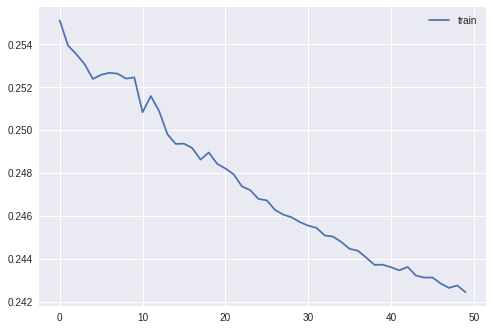

In [36]:
# Plot evaluation metrics by ntrees
plt.plot(clf_xgb_init.evals_result()['validation_0']['merror'], label='train')
plt.legend()
plt.show()

## Refit - XGB Classifier

In [37]:
# Get feature importances
df_feats = (
    pd.DataFrame(clf_xgb_init.feature_importances_, columns=['feature'])
    .set_index(df_interim_train.drop(['damage_grade', 'building_id'], axis=1).columns)
)

# Define good features
feats_to_keep = df_feats.reset_index()['index'].loc[(df_feats.feature != 0).values].values
print("Dropping {} features".format(np.sum(df_feats == 0)[0]))
print("Keeping  {} features".format(np.sum(df_feats != 0)[0]))

# Re-define datasets using only good features
X_train = df_interim_train.loc[:, feats_to_keep].values
X_val = df_interim_val.loc[:, feats_to_keep].values
X_test = df_interim_test.loc[:, feats_to_keep].values

y_train = df_interim_train['damage_grade'].values
y_val = df_interim_val['damage_grade'].values

Dropping 76 features
Keeping  37 features


In [38]:
%%time
def f1_eval_metric(preds, dtrain):
    y_true = dtrain.get_label()
    y_pred = np.argmax(preds, axis=1)
    return 'f1', -1 * f1_score(y_true, y_pred, average='micro')

# Re-fit model using only good features
clf_xgb = xgb.XGBClassifier(
    objective='multiclass:softmax',
    random_state=3,
    base_score=1,
    n_estimators=150,
    learning_rate=0.5,
    subsample=0.8,
    colsample_bytree=0.8,
    max_depth=3,
    gamma=0.1
)

clf_xgb.fit(
    X_train,
    y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    eval_metric=f1_eval_metric,
    early_stopping_rounds=10,
    verbose=False
);

CPU times: user 1min 6s, sys: 232 ms, total: 1min 6s
Wall time: 1min 6s


In [39]:
# Predict
pred_train = clf_xgb.predict(X_train)
pred_val = clf_xgb.predict(X_val)
pred_test = clf_xgb.predict(X_test)

# Evaluate
score_train = f1_score(y_train.astype(int), pred_train.astype(int), average='micro')
score_val = f1_score(y_val.astype(int), pred_val.astype(int), average='micro')
print("Train f1 score: {}".format(score_train))
print("Val f1 score:   {}".format(score_val))

Train f1 score: 0.76834744161
Val f1 score:   0.729357318108


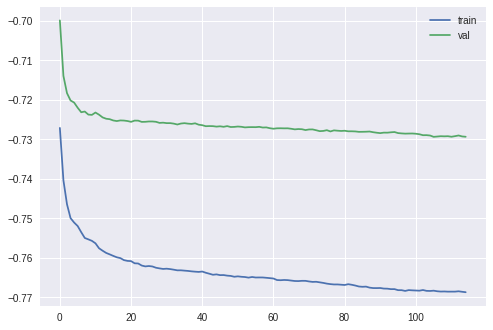

best ntree limit: 106


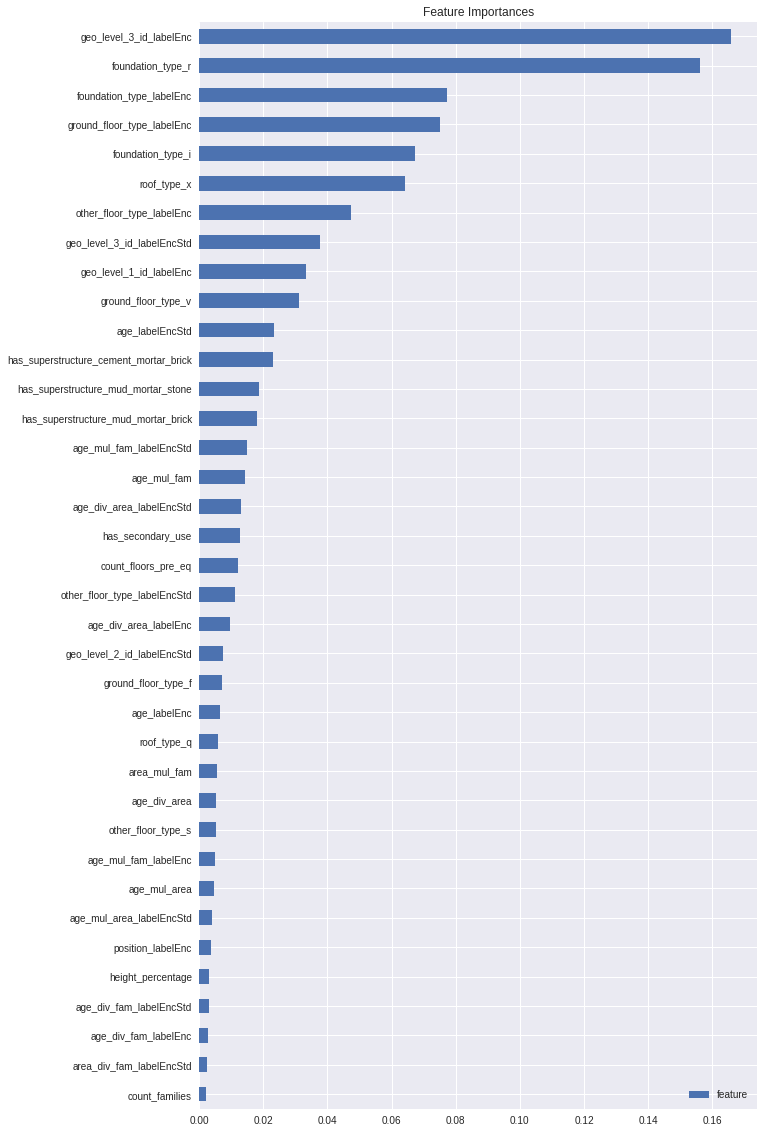

In [40]:
# Plot evaluation metrics by ntrees
plt.plot(clf_xgb.evals_result()['validation_0']['f1'], label='train')
plt.plot(clf_xgb.evals_result()['validation_1']['f1'], label='val')
plt.legend()
plt.show()
print("best ntree limit: {}".format(clf_xgb.best_ntree_limit))

# Plot feature importances
df_feats = (
    pd.DataFrame(clf_xgb.feature_importances_, columns=['feature'])
    .set_index(df_interim_train.loc[:, feats_to_keep].columns)
    .sort_values('feature')
)
df_feats.plot(kind='barh', figsize=(10, 20), title="Feature Importances")
plt.show()

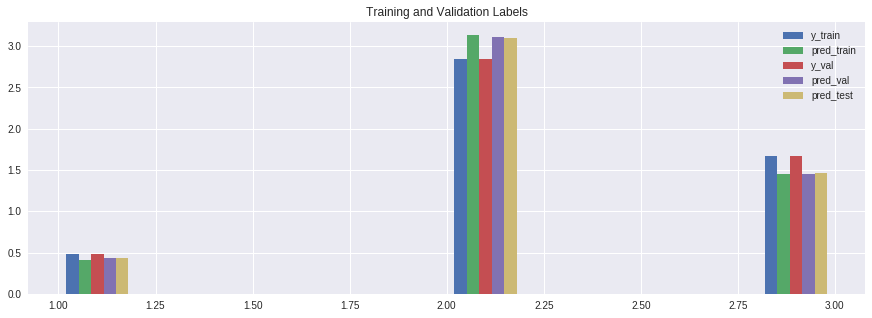

In [41]:
plt.figure(figsize=(15, 5))
plt.hist([y_train, pred_train, y_val, pred_val, pred_test], 
         density=True, 
         label=['y_train', 'pred_train', 'y_val', 'pred_val', 'pred_test'])
plt.title("Training and Validation Labels")
plt.legend()
plt.show()

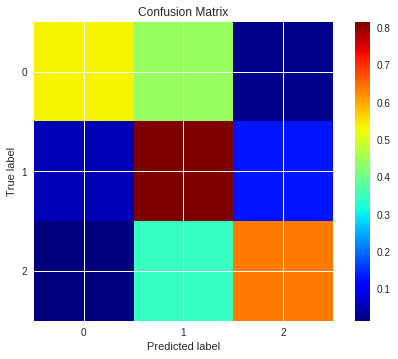

In [42]:
from sklearn.metrics import confusion_matrix
#plt.imshow(confusion_matrix(y_val.astype(int), pred_val.astype(int)))
# "scikit-learn's convention is to put predictions to columns, and true labels to rows"
# Adding figure labels to make this clear
cm = confusion_matrix(y_val.astype(int), pred_val.astype(int))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # normalize
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap='jet')
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')
#plt.colorbar()
#plt.grid(False)
plt.show()
# Notice that the model learns the prior that the middle class is the most common class,
# and that the upper class is the second most common class.

# Create Submission

In [184]:
%%time
Re-train on entire dataset
clf_xgb_final = clf_xgb
clf_xgb_final.n_estimators = clf_xgb.best_ntree_limit
clf_xgb_final.fit(
    np.concatenate((X_train, X_val)),
    np.concatenate((y_train, y_val)),
    verbose=False
)

# Make test set predictions
pred_test_final = clf_xgb_final.predict(X_test)

CPU times: user 728 ms, sys: 13.1 ms, total: 741 ms
Wall time: 739 ms


In [185]:
# Create submission file
import datetime
now = datetime.datetime.now()
(
    df_raw_test
    .assign(damage_grade=pred_test_final)
    .loc[:, ['building_id', 'damage_grade']]
    .to_csv("../models/{date}_submission_xgb.csv".format(date=now), index=False)
)

# Sandbox